In [1]:
import warnings
warnings.filterwarnings('ignore')
import re
import time
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from nltk.tokenize import word_tokenize
from gensim.models import word2vec
from util3 import *

In [ ]:
# start_time = time.time()

In [2]:
# df = pd.read_csv('./df_start_over.csv', encoding='ISO-8859-1', index_col=0)

## Load Files

In [3]:
df_train = pd.read_csv('./data/train.csv', encoding='ISO-8859-1')
df_test = pd.read_csv('./data/test.csv', encoding='ISO-8859-1')
df_desp = pd.read_csv('./data/product_descriptions.csv')
df_attr = pd.read_csv('./data/attributes.csv')

df_brand = df_attr[df_attr.name == 'MFG Brand Name'][['product_uid', 'value']].rename(columns={'value': 'brand'})
df_brand['brand'].fillna('NOBRAND', inplace=True)
num_train = df_train.shape[0]

df = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df = pd.merge(df, df_desp, how='left', on='product_uid')
df = pd.merge(df, df_brand, how='left', on='product_uid')

## Fix Typos

In [4]:
df['search_term'] = df['search_term'].map(correct_typo)

## Stemming & Tokenizing

In [18]:
df['search_term_stemmed'] = df['search_term'].map(lambda x: str_stem(x))
df['product_title_stemmed'] = df['product_title'].map(lambda x: str_stem(x))
df['product_description_stemmed'] = df['product_description'].map(lambda x: str_stem(x))
df['brand_stemmed'] = df['brand'].map(lambda x: str_stem(x))

In [5]:
df['tokens_search_term'] = df['search_term'].map(lambda x: word_tokenize(x))
df['tokens_product_title'] = df['product_title'].map(lambda x: word_tokenize(x))
df['tokens_product_description'] = df['product_description'].map(lambda x: word_tokenize(x))
df['tokens_brand'] = df['brand'].map(lambda x: word_tokenize(x))

TypeError: expected string or bytes-like object

In [19]:
df['tokens_search_term_stemmed'] = df['search_term_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_product_title_stemmed'] = df['product_title_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_product_description_stemmed'] = df['product_description_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_brand_stemmed'] = df['brand_stemmed'].map(lambda x: word_tokenize(x))

In [20]:
df.to_csv('./df_aftering_stemming_and_tokenizing.csv')

## Meta-Features

In [2]:
df = pd.read_csv('./df_aftering_stemming_and_tokenizing.csv', encoding='ISO-8859-1', index_col=0)

### Length

In [3]:
df['len_search_term'] = df['tokens_search_term'].map(lambda x: len(x))
df['len_product_title'] = df['tokens_product_title'].map(lambda x: len(x))
df['len_product_description'] = df['tokens_product_description'].map(lambda x: len(x))
df['len_brand'] = df['tokens_brand'].map(lambda x: len(x))

In [4]:
df['len_search_term_stemmed'] = df['tokens_search_term_stemmed'].map(lambda x: len(x))
df['len_product_title_stemmed'] = df['tokens_product_title_stemmed'].map(lambda x: len(x))
df['len_product_description_stemmed'] = df['tokens_product_description_stemmed'].map(lambda x: len(x))
df['len_brand_stemmed'] = df['tokens_brand_stemmed'].map(lambda x: len(x))

### Flag & Count & Ratio

In [5]:
df['flag_search_term_in_product_title'] = df.apply(lambda x: int(x['search_term'] in x['product_title']), axis=1)
df['flag_search_term_in_product_description'] = df.apply(lambda x: int(x['search_term'] in x['product_description']), axis=1)
df['flag_search_term_in_brand'] = df.apply(lambda x: int(x['search_term'] in x['brand']), axis=1)

In [6]:
df['flag_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: int(x['search_term_stemmed'] in x['product_title_stemmed']), axis=1)
df['flag_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: int(x['search_term_stemmed'] in x['product_description_stemmed']), axis=1)
df['flag_search_term_in_brand_stemmed'] \
        = df.apply(lambda x: int(x['search_term_stemmed'] in x['brand_stemmed']), axis=1)

In [7]:
df['num_search_term_in_product_title'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_title']))), axis=1)
df['num_search_term_in_product_description'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_description']))), axis=1)
df['num_search_term_in_brand'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_brand']))), axis=1)

In [8]:
df['num_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_product_title_stemmed']))), axis=1)
df['num_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_product_description_stemmed']))), axis=1)
df['num_search_term_in_brand_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_brand_stemmed']))), axis=1)

In [9]:
df['ratio_search_term_in_product_title'] = \
    df.apply(lambda x: x['num_search_term_in_product_title'] / float(x['len_search_term']), axis=1)
df['ratio_search_term_in_product_description'] = \
    df.apply(lambda x: x['num_search_term_in_product_description'] / float(x['len_search_term']), axis=1)
df['ratio_search_term_in_brand'] = \
    df.apply(lambda x: x['num_search_term_in_brand'] / float(x['len_search_term']), axis=1)

In [10]:
df['ratio_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_product_title_stemmed'] / float(x['len_search_term_stemmed']), axis=1)
df['ratio_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_product_description_stemmed'] / float(x['len_search_term_stemmed']), axis=1)
df['ratio_search_term_in_brand_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_brand_stemmed'] / float(x['len_search_term_stemmed']), axis=1)

### Encode Brand Feature

In [11]:
brands = pd.unique(df.brand.ravel())
brand_encoder = {}
index = 1000
for brand in brands:
    brand_encoder[brand] = index
    index += 10
brand_encoder['NOBRAND'] = 0

In [12]:
df['brand_encoded'] = df['brand'].map(lambda x: brand_encoder[x])

## Encode Attributes Feature

In [20]:
pid_with_attr = pd.unique(df_attr.product_uid.ravel())

In [23]:
df['flag_has_attr'] = df.apply(lambda x: int(x['product_uid'] in pid_with_attr), axis=1)

## Text Similarities

### Jaccard

In [13]:
def jaccard(A, B):
    C = A.intersection(B)
    return float(len(C)) / (len(A) + len(B) - len(C))

In [14]:
df['sim_jaccard_search_term_to_product_title'] = \
    df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_product_title'])), axis=1)
df['sim_jaccard_search_term_to_product_title_stemmed'] = \
    df.apply(lambda x: jaccard(set(x['tokens_search_term_stemmed']), set(x['tokens_product_title_stemmed'])), axis=1)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

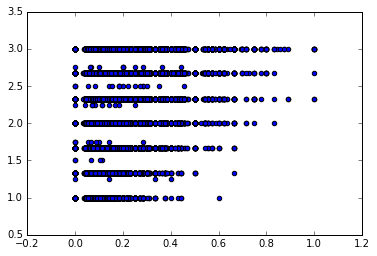

In [35]:
plt.scatter(df['sim_jaccard_search_term_to_product_title_stemmed'], df['relevance'])

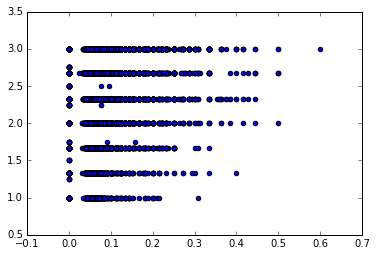

In [34]:
plt.scatter(df['sim_jaccard_search_term_to_product_title'], df['relevance'])

In [15]:
df['sim_jaccard_search_term_to_product_description'] = \
    df.apply(lambda x: jaccard(set(x['search_term']), set(x['product_description'])), axis=1)
df['sim_jaccard_search_term_to_product_description_stemmed'] = \
    df.apply(lambda x: jaccard(set(x['search_term_stemmed']), set(x['product_description_stemmed'])), axis=1)    

In [16]:
df['sim_jaccard_search_term_to_brand'] = \
    df.apply(lambda x: jaccard(set(x['search_term']), set(x['brand'])), axis=1)
df['sim_jaccard_search_term_to_brand_stemmed'] = \
    df.apply(lambda x: jaccard(set(x['search_term_stemmed']), set(x['brand_stemmed'])), axis=1)    

## Word2Vec

In [77]:
# descriptions = list(df.product_description)
# title = list(df.product_title)
# sentences = descriptions + title
# sentences = [[word for word in word_tokenize(sentence)] for sentence in sentences]

# from collections import defaultdict

# frequency = defaultdict(int)
# for sentence in sentences:
#     for token in sentence:
#         frequency[token] += 1

# sentences = [[token for token in sentence if frequency[token] > 1] for sentence in sentences]

# model = word2vec.Word2Vec(sentences, size=100, window=5, min_count=5, workers=1)
# model.save('w2v.dump')

In [28]:
w2v_model = word2vec.Word2Vec.load('w2v.dump')

In [26]:
def w2v_similarity_wrapper(model, x, y):
    try:
        return model.similarity(x, y)
    except:
        return None

In [34]:
def w2v_similarities(model, A, B):
    sims = []
    for x in A:
#         print(B)
        sims_ = [x for x in [w2v_similarity_wrapper(model, x, y) for y in B] if x is not None]
        most = max(sims_) if sims_ else None
        sims.append(most)
    sims = list(filter(lambda x: x is not None, sims))
    if not sims:
        return .0, .0, .0
    min_sim = min(sims)
    max_sim = max(sims)
    avg_sim = sum(sims) / float(len(A))
    return (min_sim, max_sim, avg_sim)

In [ ]:
df['sim_w2v_search_term_to_product_title_tuples'] = \
    df.apply(lambda x: w2v_similarities(w2v_model, x['tokens_search_term'], x['tokens_product_title']), axis=1)

In [ ]:
df['sim_w2v_search_term_to_product_title_min'] = df['sim_w2v_search_term_to_product_title_tuples'].map(lambda x: x[0])
df['sim_w2v_search_term_to_product_title_max'] = df['sim_w2v_search_term_to_product_title_tuples'].map(lambda x: x[1])
df['sim_w2v_search_term_to_product_title_avg'] = df['sim_w2v_search_term_to_product_title_tuples'].map(lambda x: x[2])

In [ ]:
df['sim_w2v_search_term_to_product_description_tuples'] = \
    df.apply(lambda x: w2v_similarities(w2v_model, x['tokens_search_term'], x['tokens_product_description']), axis=1)

In [ ]:
df['sim_w2v_search_term_to_product_description_min'] = df['sim_w2v_search_term_to_product_description_tuples'].map(lambda x: x[0])
df['sim_w2v_search_term_to_product_description_max'] = df['sim_w2v_search_term_to_product_description_tuples'].map(lambda x: x[1])
df['sim_w2v_search_term_to_product_description_avg'] = df['sim_w2v_search_term_to_product_description_tuples'].map(lambda x: x[2])

## Export

In [ ]:
cols_to_drop = list(filter(lambda x: x.startswith('tokens'), df.columns.tolist()))
cols_to_drop

In [97]:
cols_to_stem = ['search_term', 'product_title', 'product_description', 'brand']

In [91]:
df.drop(cols_to_drop+cols_to_stem, axis=1, inplace=True)

In [98]:
dict([(col+'_stemmed', col) for col in cols_to_stem])

{'brand_stemmed': 'brand',
 'product_description_stemmed': 'product_description',
 'product_title_stemmed': 'product_title',
 'search_term_stemmed': 'search_term'}

In [103]:
df.rename(columns=dict([(col+'_stemmed', col) for col in cols_to_stem]), inplace=True)

In [104]:
df

,id,product_uid,relevance,search_term,product_title,product_description,len_search_term,len_product_title,len_product_description,flag_search_term_in_product_title,flag_search_term_in_product_description,sim_jaccard_search_term_to_product_title,sim_jaccard_search_term_to_product_title_stemmed,sim_jaccard_search_term_to_product_description,flag_search_term_in_product_title_stemmed,flag_search_term_in_product_description_stemmed,num_search_term_in_product_title,num_search_term_in_product_description,num_search_term_in_product_title_stemmed,num_search_term_in_product_description_stemmed,ratio_search_term_in_product_title,ratio_search_term_in_product_description,len_search_term_stemmed,len_product_title_stemmed,len_product_description_stemmed,ratio_search_term_in_product_title_stemmed,ratio_search_term_in_product_description_stemmed,brand_encoded,flag_search_term_in_brand,brand,len_brand,len_brand_stemmed,flag_search_term_in_brand_stemmed,num_search_term_in_brand,num_search_term_in_brand_stemmed,ratio_search_term_in_brand,ratio_search_term_in_brand_stemmed,lev_dist_to_product_title_min,lev_dist_to_product_title_max,lev_dist_to_product_title_sum,lev_dist_to_product_description_min,lev_dist_to_product_description_max,lev_dist_to_product_description_sum,sim_jaccard_search_term_to_product_description_stemmed
0,2,100001,3.00,angl bracket,simpson strong tie 12 gaug angl,not onli do angl make joint stronger they also...,2,4,148,0,0,0.000000,0.142857,0.207547,0,0,0,0,1,1,0.000000,0.000000,2,6,147,0.500000,0.500000,1000,0,simpson strong tie,2,3,0,0,0,0.000000,0.000000,3,7,63,3,16,321,0.297297
1,3,100001,2.50,l bracket,simpson strong tie 12 gaug angl,not onli do angl make joint stronger they also...,2,4,148,0,0,0.000000,0.000000,0.169811,0,0,0,0,0,0,0.000000,0.000000,2,6,147,0.000000,0.000000,1000,0,simpson strong tie,2,3,0,0,0,0.000000,0.000000,3,7,67,3,18,337,0.243243
2,9,100002,3.00,deck over,behr premium textur deckov 1gal. #sc 141 tugbo...,behr premium textur deckov is an innov solid c...,2,13,196,0,0,0.000000,0.000000,0.140351,0,0,0,1,0,1,0.000000,0.500000,2,14,180,0.000000,0.500000,1010,0,behr premium textur deckov,4,4,0,0,0,0.000000,0.000000,2,7,120,2,18,337,0.210526
3,16,100005,2.33,rain shower head,delta vero 1 handl shower onli faucet trim kit...,updat your bathroom with the delta vero singl ...,3,15,116,0,0,0.000000,0.055556,0.189655,0,0,0,0,1,1,0.000000,0.000000,3,16,118,0.333333,0.333333,1020,0,delta,1,1,0,0,0,0.000000,0.000000,2,9,197,3,14,428,0.289474
4,17,100005,2.67,shower onli faucet,delta vero 1 handl shower onli faucet trim kit...,updat your bathroom with the delta vero singl ...,3,15,116,0,0,0.000000,0.187500,0.258621,1,0,0,1,3,3,0.000000,0.333333,3,16,118,1.000000,1.000000,1020,0,delta,1,1,0,0,0,0.000000,0.000000,3,8,206,3,14,440,0.394737
5,18,100006,3.00,convect otr,whirlpool 1.9cu.ft. over the rang convect micr...,achiev delici result is almost effortless with...,2,16,542,0,0,0.000000,0.066667,0.150000,0,0,0,1,1,1,0.000000,0.500000,2,14,530,0.500000,0.500000,1030,0,whirlpool,1,1,0,0,0,0.000000,0.000000,2,9,163,3,16,312,0.195122
6,20,100006,2.67,microwav over stove,whirlpool 1.9cu.ft. over the rang convect micr...,achiev delici result is almost effortless with...,3,16,542,0,0,0.000000,0.133333,0.200000,0,0,0,2,2,2,0.000000,0.666667,3,14,530,0.666667,0.666667,1030,0,whirlpool,1,1,0,0,0,0.000000,0.000000,3,9,262,3,16,477,0.292683
7,21,100006,3.00,microwav,whirlpool 1.9cu.ft. over the rang convect micr...,achiev delici result is almost effortless with...,1,16,542,0,0,0.000000,0.071429,0.166667,1,1,0,0,1,1,0.000000,0.000000,1,14,530,1.000000,1.000000,1030,0,whirlpool,1,1,0,0,0,0.000000,0.000000,6,9,113,6,15,170,0.195122
8,23,100007,2.67,emerg light,lithonia light quantum 2 light black led emerg...,the quantum adjust 2 light led black emerg lig...,2,9,127,0,0,0.000000,0.222222,0.260870,0,1,0,1,2,2,0.000000,0.500000,2,10,138,1.000000,1.000000,1040,0,lithonia light,2,2,0,0,1,0.000000,0.500000,4,8,84,3,17,297,0.272727
9,27,1

## Append

In [103]:
lev = pd.read_csv('df_final_lev_dist_more.csv', encoding='ISO-8859-1')

In [116]:
cols_to_drop_lev = list(filter(lambda x: not x.startswith('lev'), lev.columns.tolist()))

In [117]:
lev.drop(cols_to_drop_lev, axis=1, inplace=True)

In [119]:
for x in lev.columns.tolist():
    df[x] = lev[x]

In [135]:

# df.drop(['id', 'product_uid', 'relevance',
#                        'search_term', 'search_term_stemmed',
#                        'product_title', 'product_title_stemmed',
#                        'product_description', 'product_description_stemmed',
#                        'brand', 'brand_stemmed'
#                        ], axis=1).head()

,len_search_term,len_product_title,len_product_description,flag_search_term_in_product_title,flag_search_term_in_product_description,sim_jaccard_search_term_to_product_title,sim_jaccard_search_term_to_product_title_stemmed,sim_jaccard_search_term_to_product_description,flag_search_term_in_product_title_stemmed,flag_search_term_in_product_description_stemmed,num_search_term_in_product_title,num_search_term_in_product_description,num_search_term_in_product_title_stemmed,num_search_term_in_product_description_stemmed,ratio_search_term_in_product_title,ratio_search_term_in_product_description,len_search_term_stemmed,len_product_title_stemmed,len_product_description_stemmed,ratio_search_term_in_product_title_stemmed,ratio_search_term_in_product_description_stemmed,brand_encoded,flag_search_term_in_brand,len_brand,len_brand_stemmed,flag_search_term_in_brand_stemmed,num_search_term_in_brand,num_search_term_in_brand_stemmed,ratio_search_term_in_brand,ratio_search_term_in_brand_stemmed,lev_dist_to_product_title_min,lev_dist_to_product_title_max,lev_dist_to_product_title_sum,lev_dist_to_product_description_min,lev_dist_to_product_description_max,lev_dist_to_product_description_sum
0,2,4,148,0,0,0,0.142857,0.207547,0,0,0,0,1,1,0,0.000000,2,6,147,0.500000,0.500000,1000,0,2,3,0,0,0,0,0,3,7,63,3,16,321
1,2,4,148,0,0,0,0.000000,0.169811,0,0,0,0,0,0,0,0.000000,2,6,147,0.000000,0.000000,1000,0,2,3,0,0,0,0,0,3,7,67,3,18,337
2,2,13,196,0,0,0,0.000000,0.140351,0,0,0,1,0,1,0,0.500000,2,14,180,0.000000,0.500000,1010,0,4,4,0,0,0,0,0,2,7,120,2,18,337
3,3,15,116,0,0,0,0.055556,0.189655,0,0,0,0,1,1,0,0.000000,3,16,118,0.333333,0.333333,1020,0,1,1,0,0,0,0,0,2,9,197,3,14,428
4,3,15,116,0,0,0,0.187500,0.258621,1,0,0,1,3,3,0,0.333333,3,16,118,1.000000,1.000000,1020,0,1,1,0,0,0,0,0,3,8,206,3,14,440


In [ ]:
df.to_csv('./df_start_over.csv')

In [19]:
cols_to_drop_lev = list(filter(lambda x: x.startswith('sim'), df.columns.tolist()))

In [20]:
cols_to_drop_lev

['sim_jaccard_search_term_to_product_title',
 'sim_jaccard_search_term_to_product_title_stemmed',
 'sim_jaccard_search_term_to_product_description',
 'sim_jaccard_search_term_to_product_description_stemmed']

In [11]:
original = pd.read_csv('./df_final_lev_dist_more.csv', encoding='ISO-8859-1', index_col=0)

In [21]:
for col in cols_to_drop_lev:
    original[col] = df[col]

In [22]:
original.to_csv('./df_lev_dist_more_jaccard.csv')